# LightGBM
### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*

## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "pathfinder-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_immunities          1206 non-null   int64  
 1   hp                      1206 non-null   int64  
 2   book                    1206 non-null   object 
 3   reflex                  1206 non-null   int64  
 4   fortitude               1206 non-null   int64  
 5   str                     1206 non-null   int64  
 6   con                     1206 non-null   int64  
 7   int                     1206 non-null   int64  
 8   perception              1206 non-null   int64  
 9   wis                     1206 non-null   int64  
 10  focus                   1206 non-null   int32  
 11  land_speed              1206 non-null   float64
 12  level                   1206 non-null   int64  
 13  cha                     1206 non-null   int64  
 14  dex                     1206 non-null   

In [3]:
df.head()

,num_immunities,hp,book,reflex,fortitude,str,con,int,perception,wis,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,3,215,Pathfinder Bestiary,19,22,7,5,1,20,2,...,0,0,0,0,0,0,23,22.0,0,0.0
1,0,220,Pathfinder Bestiary,14,21,9,5,-4,16,2,...,0,0,0,0,0,0,23,22.0,0,0.0
2,0,175,Pathfinder Bestiary,17,20,7,6,-4,17,3,...,0,0,0,0,0,0,21,16.0,0,0.0
3,3,315,Pathfinder Bestiary,29,30,7,5,6,30,5,...,1,0,1,0,0,0,33,31.5,0,0.0
4,0,20,Pathfinder Bestiary,10,6,-5,1,-1,6,1,...,1,0,0,0,0,0,0,0.0,8,5.0


###### Level

In [4]:
y = df["level"]
y

0       10
1       10
2        8
3       17
4        1
        ..
1201    20
1202    -1
1203    12
1204     6
1205     6
Name: level, Length: 1206, dtype: int64

In [5]:
from collections import defaultdict


lvl_stat = defaultdict(lambda: 0)

for lvl in y:
    lvl_stat[lvl] += 1

In [6]:
level_count = pd.DataFrame(
    data={
        "lvl": [key for key in sorted(lvl_stat.keys())],
        "count": [lvl_stat.get(key) for key in sorted(lvl_stat.keys())],
    }
)
level_count

,lvl,count
0,-1,34
1,0,27
2,1,127
3,2,121
4,3,95
5,4,82
6,5,76
7,6,72
8,7,77
9,8,68


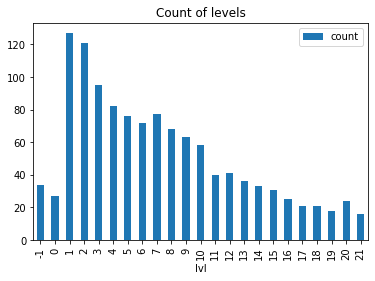

In [7]:
import matplotlib.pyplot as plt


level_count.plot.bar(x="lvl", y="count", title="Count of levels")
plt.show()

## Train test split

### Chronological split

In [8]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/lightgbm")

In [9]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

### Random split

In [10]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [11]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## LightGBM

## Chronological split

In [12]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 841, number of used features: 45
[LightGBM] [Info] Start training from score 6.966706
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[88]	valid_0's l1: 0.463517	valid_0's l2: 0.932502


In [13]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.97
MAE: 0.46


In [15]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "full", rmse, mae]

In [16]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 0.13
RMSE test: 0.97


###### MAE by level

In [17]:
from training.results import plot_mae_by_level

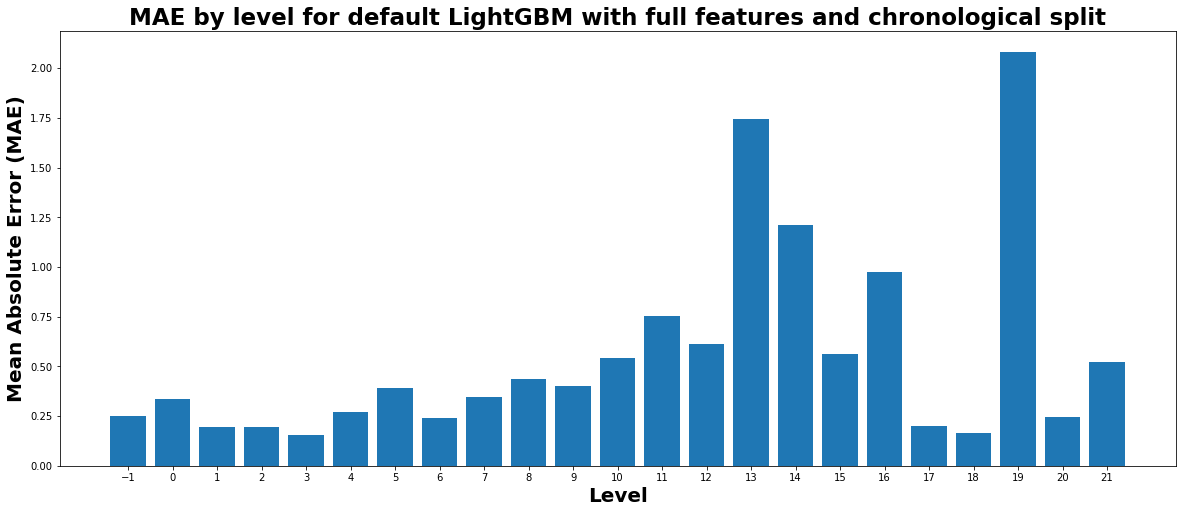

In [18]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and chronological split",
)

In [19]:
from training.results import check_round_predictions, plot_confusion_matrix


check_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.97

Round type: 0.5
RMSE: 0.98

Round type: 0.33
RMSE: 0.96

Round type: 0.45
RMSE: 0.96



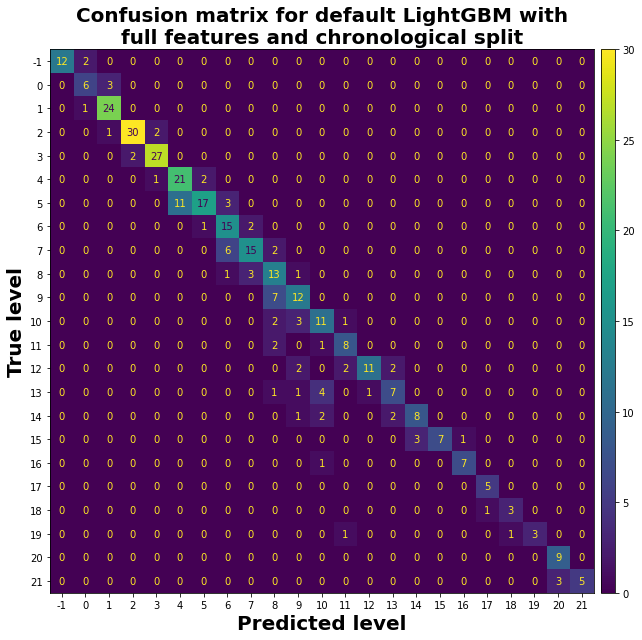

In [20]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default LightGBM with\nfull features and chronological split",
)

#### Tuning

In [21]:
from training.results import assess_regression_model

In [22]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-09 13:20:02,370] A new study created in memory with name: no-name-04666131-eb34-4172-998b-39137e54efc9
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.147141 + 0.0339963
[200]	cv_agg's l2: 0.143569 + 0.0324626
[300]	cv_agg's l2: 0.14305 + 0.0323676


feature_fraction, val_score: 0.142682:  14%|######4                                      | 1/7 [00:06<00:40,  6.76s/it]

Early stopping, best iteration is:
[259]	cv_agg's l2: 0.142682 + 0.0323331
[100]	cv_agg's l2: 0.149085 + 0.0431141
[200]	cv_agg's l2: 0.143257 + 0.0394899
[300]	cv_agg's l2: 0.142 + 0.039474
[400]	cv_agg's l2: 0.141072 + 0.0392175
[500]	cv_agg's l2: 0.140832 + 0.0391198
[600]	cv_agg's l2: 0.140812 + 0.0392933


feature_fraction, val_score: 0.140741:  29%|############8                                | 2/7 [00:17<00:44,  8.82s/it]

Early stopping, best iteration is:
[592]	cv_agg's l2: 0.140741 + 0.0393081
[100]	cv_agg's l2: 0.153433 + 0.0361593
[200]	cv_agg's l2: 0.151284 + 0.0361474
[300]	cv_agg's l2: 0.150988 + 0.0360248
[400]	cv_agg's l2: 0.151056 + 0.0361271
[500]	cv_agg's l2: 0.151145 + 0.0364054
[600]	cv_agg's l2: 0.151174 + 0.036402


feature_fraction, val_score: 0.140741:  43%|###################2                         | 3/7 [00:26<00:37,  9.34s/it]

Early stopping, best iteration is:
[592]	cv_agg's l2: 0.140741 + 0.0393081
[100]	cv_agg's l2: 0.144924 + 0.0325426
[200]	cv_agg's l2: 0.141683 + 0.0311121
[300]	cv_agg's l2: 0.140849 + 0.0301638
[400]	cv_agg's l2: 0.140714 + 0.0301373
[500]	cv_agg's l2: 0.140727 + 0.030046


feature_fraction, val_score: 0.140573:  57%|#########################7                   | 4/7 [00:35<00:27,  9.20s/it]

Early stopping, best iteration is:
[441]	cv_agg's l2: 0.140573 + 0.0299096
[100]	cv_agg's l2: 0.142787 + 0.0390276
[200]	cv_agg's l2: 0.138839 + 0.0363351
[300]	cv_agg's l2: 0.138152 + 0.0354178
[400]	cv_agg's l2: 0.137952 + 0.0347705
[500]	cv_agg's l2: 0.137803 + 0.0345155
[600]	cv_agg's l2: 0.137724 + 0.0342233
[700]	cv_agg's l2: 0.137661 + 0.0341299
[800]	cv_agg's l2: 0.137681 + 0.0340453


feature_fraction, val_score: 0.137600:  71%|################################1            | 5/7 [00:50<00:21, 10.98s/it]

Early stopping, best iteration is:
[729]	cv_agg's l2: 0.1376 + 0.034107
[100]	cv_agg's l2: 0.13813 + 0.0344683
[200]	cv_agg's l2: 0.133618 + 0.0323802
[300]	cv_agg's l2: 0.132715 + 0.0324646
[400]	cv_agg's l2: 0.132409 + 0.0320448


feature_fraction, val_score: 0.132339:  86%|######################################5      | 6/7 [00:58<00:10, 10.16s/it]

Early stopping, best iteration is:
[384]	cv_agg's l2: 0.132339 + 0.0321137
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


feature_fraction, val_score: 0.131830: 100%|#############################################| 7/7 [01:07<00:00,  9.66s/it]


Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448


num_leaves, val_score: 0.131830:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.241162 + 0.0405064
[200]	cv_agg's l2: 0.216172 + 0.0365431
[300]	cv_agg's l2: 0.201285 + 0.0350276
[400]	cv_agg's l2: 0.191554 + 0.0330505


num_leaves, val_score: 0.131830:   5%|##5                                               | 1/20 [00:01<00:33,  1.77s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  10%|#####                                             | 2/20 [00:11<01:52,  6.25s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  15%|#######5                                          | 3/20 [00:21<02:14,  7.91s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  20%|##########                                        | 4/20 [00:31<02:25,  9.11s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  25%|############5                                     | 5/20 [00:41<02:19,  9.27s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  30%|###############                                   | 6/20 [00:50<02:08,  9.19s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  35%|#################5                                | 7/20 [00:59<01:57,  9.06s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  40%|####################                              | 8/20 [01:08<01:47,  8.94s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  45%|######################5                           | 9/20 [01:16<01:36,  8.76s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  50%|########################5                        | 10/20 [01:25<01:27,  8.71s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  55%|##########################9                      | 11/20 [01:34<01:21,  9.08s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  60%|#############################4                   | 12/20 [01:46<01:19,  9.88s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  65%|###############################8                 | 13/20 [01:56<01:09,  9.91s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  70%|##################################3              | 14/20 [02:09<01:04, 10.82s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  75%|####################################7            | 15/20 [02:18<00:51, 10.30s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  80%|#######################################2         | 16/20 [02:26<00:38,  9.70s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  85%|#########################################6       | 17/20 [02:36<00:29,  9.69s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  90%|############################################1    | 18/20 [02:44<00:18,  9.00s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830:  95%|##############################################5  | 19/20 [02:52<00:08,  8.80s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.138029 + 0.0347771
[200]	cv_agg's l2: 0.133246 + 0.0329534
[300]	cv_agg's l2: 0.132059 + 0.0323665
[400]	cv_agg's l2: 0.13197 + 0.0322145


num_leaves, val_score: 0.131830: 100%|#################################################| 20/20 [03:01<00:00,  9.07s/it]


Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448


bagging, val_score: 0.131830:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.153049 + 0.0315374
[200]	cv_agg's l2: 0.147983 + 0.0299803
[300]	cv_agg's l2: 0.146833 + 0.02997
[400]	cv_agg's l2: 0.14713 + 0.0311492


bagging, val_score: 0.131830:  10%|#####3                                               | 1/10 [00:06<01:00,  6.77s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.178586 + 0.0346562
[200]	cv_agg's l2: 0.169667 + 0.0340728
[300]	cv_agg's l2: 0.165281 + 0.0340536
[400]	cv_agg's l2: 0.164122 + 0.0320205


bagging, val_score: 0.131830:  20%|##########6                                          | 2/10 [00:11<00:42,  5.35s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.146264 + 0.0376827
[200]	cv_agg's l2: 0.141143 + 0.0361944
[300]	cv_agg's l2: 0.140164 + 0.035764
[400]	cv_agg's l2: 0.139979 + 0.0357691


bagging, val_score: 0.131830:  30%|###############9                                     | 3/10 [00:19<00:46,  6.66s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.19325 + 0.0372615
[200]	cv_agg's l2: 0.177817 + 0.0379326
[300]	cv_agg's l2: 0.173768 + 0.0422806
[400]	cv_agg's l2: 0.171252 + 0.03974


bagging, val_score: 0.131830:  40%|#####################2                               | 4/10 [00:23<00:34,  5.81s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.137655 + 0.0325472
[200]	cv_agg's l2: 0.133329 + 0.0321179
[300]	cv_agg's l2: 0.132409 + 0.0313801
[400]	cv_agg's l2: 0.13216 + 0.0310569


bagging, val_score: 0.131830:  50%|##########################5                          | 5/10 [00:32<00:34,  6.87s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.164607 + 0.0350942
[200]	cv_agg's l2: 0.161169 + 0.0344631
[300]	cv_agg's l2: 0.159538 + 0.0336909
[400]	cv_agg's l2: 0.158793 + 0.0323719


bagging, val_score: 0.131830:  60%|###############################8                     | 6/10 [00:38<00:25,  6.43s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.157612 + 0.029416
[200]	cv_agg's l2: 0.151766 + 0.0305484
[300]	cv_agg's l2: 0.151051 + 0.0297271
[400]	cv_agg's l2: 0.150339 + 0.0294473


bagging, val_score: 0.131830:  70%|#####################################                | 7/10 [00:44<00:19,  6.51s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.164965 + 0.0354557
[200]	cv_agg's l2: 0.161603 + 0.0319693
[300]	cv_agg's l2: 0.161608 + 0.0315971
[400]	cv_agg's l2: 0.16214 + 0.0330673


bagging, val_score: 0.131830:  80%|##########################################4          | 8/10 [00:50<00:12,  6.25s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.139524 + 0.0321089
[200]	cv_agg's l2: 0.132447 + 0.0295642
[300]	cv_agg's l2: 0.132478 + 0.0294711
[400]	cv_agg's l2: 0.132381 + 0.029494


bagging, val_score: 0.131830:  90%|###############################################7     | 9/10 [00:59<00:06,  6.96s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.171254 + 0.0314269
[200]	cv_agg's l2: 0.166664 + 0.0302208
[300]	cv_agg's l2: 0.162411 + 0.0308985
[400]	cv_agg's l2: 0.161117 + 0.0291934


bagging, val_score: 0.131830: 100%|####################################################| 10/10 [01:04<00:00,  6.42s/it]


Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448


feature_fraction_stage2, val_score: 0.131830:   0%|                                              | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.149584 + 0.0401624
[200]	cv_agg's l2: 0.14246 + 0.0374796
[300]	cv_agg's l2: 0.1407 + 0.0363591
[400]	cv_agg's l2: 0.140266 + 0.0358344


feature_fraction_stage2, val_score: 0.131830:  17%|######3                               | 1/6 [00:08<00:41,  8.31s/it]

Early stopping, best iteration is:
[361]	cv_agg's l2: 0.13183 + 0.0322448
[100]	cv_agg's l2: 0.136836 + 0.0352008
[200]	cv_agg's l2: 0.130307 + 0.0340637
[300]	cv_agg's l2: 0.12918 + 0.0336656
[400]	cv_agg's l2: 0.128762 + 0.0332093


feature_fraction_stage2, val_score: 0.128618:  33%|############6                         | 2/6 [00:18<00:36,  9.19s/it]

Early stopping, best iteration is:
[392]	cv_agg's l2: 0.128618 + 0.0332162
[100]	cv_agg's l2: 0.139594 + 0.036764
[200]	cv_agg's l2: 0.135218 + 0.0359023
[300]	cv_agg's l2: 0.135012 + 0.0348201
[400]	cv_agg's l2: 0.134451 + 0.0344333


feature_fraction_stage2, val_score: 0.128618:  50%|###################                   | 3/6 [00:28<00:29,  9.80s/it]

Early stopping, best iteration is:
[392]	cv_agg's l2: 0.128618 + 0.0332162
[100]	cv_agg's l2: 0.134861 + 0.0332399
[200]	cv_agg's l2: 0.129151 + 0.032795
[300]	cv_agg's l2: 0.128509 + 0.032741
[400]	cv_agg's l2: 0.128516 + 0.0324668


feature_fraction_stage2, val_score: 0.128427:  67%|#########################3            | 4/6 [00:37<00:18,  9.25s/it]

Early stopping, best iteration is:
[394]	cv_agg's l2: 0.128427 + 0.0324547
[100]	cv_agg's l2: 0.135773 + 0.0329917
[200]	cv_agg's l2: 0.131599 + 0.0314493
[300]	cv_agg's l2: 0.130561 + 0.0309275
[400]	cv_agg's l2: 0.129872 + 0.0307032


feature_fraction_stage2, val_score: 0.128427:  83%|###############################6      | 5/6 [00:45<00:08,  8.98s/it]

Early stopping, best iteration is:
[394]	cv_agg's l2: 0.128427 + 0.0324547
[100]	cv_agg's l2: 0.135194 + 0.0295179
[200]	cv_agg's l2: 0.130332 + 0.0281026
[300]	cv_agg's l2: 0.130237 + 0.0277612
[400]	cv_agg's l2: 0.130113 + 0.0273341


feature_fraction_stage2, val_score: 0.128427: 100%|######################################| 6/6 [00:55<00:00,  9.28s/it]


Early stopping, best iteration is:
[394]	cv_agg's l2: 0.128427 + 0.0324547


regularization_factors, val_score: 0.128427:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.134558 + 0.0315773
[200]	cv_agg's l2: 0.128586 + 0.0304366
[300]	cv_agg's l2: 0.126994 + 0.0305176
[400]	cv_agg's l2: 0.126577 + 0.0304747
[500]	cv_agg's l2: 0.126531 + 0.0301637


regularization_factors, val_score: 0.126445:   5%|#9                                    | 1/20 [00:09<03:04,  9.69s/it]

Early stopping, best iteration is:
[432]	cv_agg's l2: 0.126445 + 0.030395
[100]	cv_agg's l2: 0.135547 + 0.0339163
[200]	cv_agg's l2: 0.131 + 0.0332159
[300]	cv_agg's l2: 0.129527 + 0.0328046
[400]	cv_agg's l2: 0.129566 + 0.0325594
[500]	cv_agg's l2: 0.129706 + 0.0324599


regularization_factors, val_score: 0.126445:  10%|###8                                  | 2/20 [00:19<02:50,  9.50s/it]

Early stopping, best iteration is:
[432]	cv_agg's l2: 0.126445 + 0.030395
[100]	cv_agg's l2: 0.13343 + 0.0314152
[200]	cv_agg's l2: 0.126709 + 0.0297614
[300]	cv_agg's l2: 0.125689 + 0.0296614
[400]	cv_agg's l2: 0.12558 + 0.0295745
[500]	cv_agg's l2: 0.125267 + 0.0295478


regularization_factors, val_score: 0.125234:  15%|#####7                                | 3/20 [00:29<02:51, 10.10s/it]

[600]	cv_agg's l2: 0.1253 + 0.0295575
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.134634 + 0.0332348
[200]	cv_agg's l2: 0.12892 + 0.0315627
[300]	cv_agg's l2: 0.127846 + 0.0307828
[400]	cv_agg's l2: 0.127273 + 0.0300944
[500]	cv_agg's l2: 0.127358 + 0.0300915


regularization_factors, val_score: 0.125234:  20%|#######6                              | 4/20 [00:40<02:47, 10.47s/it]

[600]	cv_agg's l2: 0.127652 + 0.0300929
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.136203 + 0.0347032
[200]	cv_agg's l2: 0.131988 + 0.0349861
[300]	cv_agg's l2: 0.130321 + 0.0340569
[400]	cv_agg's l2: 0.130308 + 0.0338142
[500]	cv_agg's l2: 0.130471 + 0.0338251


regularization_factors, val_score: 0.125234:  25%|#########5                            | 5/20 [00:51<02:37, 10.51s/it]

[600]	cv_agg's l2: 0.13048 + 0.0337153
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.134212 + 0.0339679
[200]	cv_agg's l2: 0.129959 + 0.0319736
[300]	cv_agg's l2: 0.128631 + 0.0308676
[400]	cv_agg's l2: 0.128183 + 0.0302379
[500]	cv_agg's l2: 0.128109 + 0.0300427


regularization_factors, val_score: 0.125234:  30%|###########4                          | 6/20 [01:02<02:31, 10.79s/it]

[600]	cv_agg's l2: 0.128035 + 0.029979
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.132856 + 0.0306147
[200]	cv_agg's l2: 0.12762 + 0.0298933
[300]	cv_agg's l2: 0.126086 + 0.0294302
[400]	cv_agg's l2: 0.125949 + 0.0293031
[500]	cv_agg's l2: 0.126002 + 0.0294502


regularization_factors, val_score: 0.125234:  35%|#############3                        | 7/20 [01:14<02:22, 10.93s/it]

[600]	cv_agg's l2: 0.12598 + 0.0294101
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.132234 + 0.0339537
[200]	cv_agg's l2: 0.127783 + 0.0324671
[300]	cv_agg's l2: 0.126396 + 0.0318458
[400]	cv_agg's l2: 0.126073 + 0.0317944
[500]	cv_agg's l2: 0.125813 + 0.0317389


regularization_factors, val_score: 0.125234:  40%|###############2                      | 8/20 [01:24<02:09, 10.81s/it]

[600]	cv_agg's l2: 0.125864 + 0.0315711
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.13342 + 0.0307867
[200]	cv_agg's l2: 0.127973 + 0.0308202
[300]	cv_agg's l2: 0.1271 + 0.030934
[400]	cv_agg's l2: 0.126482 + 0.030591
[500]	cv_agg's l2: 0.126393 + 0.0305146


regularization_factors, val_score: 0.125234:  45%|#################1                    | 9/20 [01:35<01:58, 10.76s/it]

[600]	cv_agg's l2: 0.126385 + 0.0303693
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.133082 + 0.0305192
[200]	cv_agg's l2: 0.128453 + 0.029976
[300]	cv_agg's l2: 0.12751 + 0.0297663
[400]	cv_agg's l2: 0.127196 + 0.0293761
[500]	cv_agg's l2: 0.127092 + 0.0291191


regularization_factors, val_score: 0.125234:  50%|##################5                  | 10/20 [01:46<01:49, 10.93s/it]

[600]	cv_agg's l2: 0.127161 + 0.028976
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.135615 + 0.0316497
[200]	cv_agg's l2: 0.129772 + 0.0309313
[300]	cv_agg's l2: 0.129062 + 0.0312252
[400]	cv_agg's l2: 0.128719 + 0.0308332
[500]	cv_agg's l2: 0.128642 + 0.0305418


regularization_factors, val_score: 0.125234:  55%|####################3                | 11/20 [01:58<01:40, 11.12s/it]

[600]	cv_agg's l2: 0.128557 + 0.0303716
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.134034 + 0.0323946
[200]	cv_agg's l2: 0.129394 + 0.0326238
[300]	cv_agg's l2: 0.12865 + 0.0325399
[400]	cv_agg's l2: 0.128025 + 0.0322962
[500]	cv_agg's l2: 0.128201 + 0.0323134


regularization_factors, val_score: 0.125234:  60%|######################2              | 12/20 [02:05<01:20, 10.00s/it]

[600]	cv_agg's l2: 0.128092 + 0.032234
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.133823 + 0.0312971
[200]	cv_agg's l2: 0.12926 + 0.0308719
[300]	cv_agg's l2: 0.127726 + 0.029855
[400]	cv_agg's l2: 0.127287 + 0.0296834
[500]	cv_agg's l2: 0.127443 + 0.0295246


regularization_factors, val_score: 0.125234:  65%|########################             | 13/20 [02:14<01:07,  9.64s/it]

[600]	cv_agg's l2: 0.127579 + 0.0295352
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.180308 + 0.0339701
[200]	cv_agg's l2: 0.177571 + 0.034118
[300]	cv_agg's l2: 0.177571 + 0.0341181
[400]	cv_agg's l2: 0.177571 + 0.0341181
[500]	cv_agg's l2: 0.177571 + 0.0341181


regularization_factors, val_score: 0.125234:  70%|#########################9           | 14/20 [02:16<00:43,  7.31s/it]

[600]	cv_agg's l2: 0.177571 + 0.0341181
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.132024 + 0.0314772
[200]	cv_agg's l2: 0.12748 + 0.030742
[300]	cv_agg's l2: 0.125983 + 0.0302791
[400]	cv_agg's l2: 0.125626 + 0.0302292
[500]	cv_agg's l2: 0.125613 + 0.0299943


regularization_factors, val_score: 0.125234:  75%|###########################7         | 15/20 [02:24<00:37,  7.52s/it]

[600]	cv_agg's l2: 0.125689 + 0.0298993
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.135253 + 0.0335738
[200]	cv_agg's l2: 0.13073 + 0.0333812
[300]	cv_agg's l2: 0.129844 + 0.0327097
[400]	cv_agg's l2: 0.129646 + 0.0322715
[500]	cv_agg's l2: 0.129465 + 0.0319653


regularization_factors, val_score: 0.125234:  80%|#############################6       | 16/20 [02:32<00:30,  7.71s/it]

[600]	cv_agg's l2: 0.129481 + 0.0320106
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.133899 + 0.0333683
[200]	cv_agg's l2: 0.12945 + 0.0326715
[300]	cv_agg's l2: 0.12865 + 0.0322301
[400]	cv_agg's l2: 0.128479 + 0.0321218
[500]	cv_agg's l2: 0.128533 + 0.0318642


regularization_factors, val_score: 0.125234:  85%|###############################4     | 17/20 [02:40<00:23,  7.80s/it]

[600]	cv_agg's l2: 0.128633 + 0.0318555
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.135239 + 0.0338319
[200]	cv_agg's l2: 0.131027 + 0.0326699
[300]	cv_agg's l2: 0.129698 + 0.0317234
[400]	cv_agg's l2: 0.129262 + 0.0317147
[500]	cv_agg's l2: 0.129122 + 0.0316684


regularization_factors, val_score: 0.125234:  90%|#################################3   | 18/20 [02:48<00:15,  7.82s/it]

[600]	cv_agg's l2: 0.12922 + 0.0316841
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.134863 + 0.0332388
[200]	cv_agg's l2: 0.129463 + 0.0325955
[300]	cv_agg's l2: 0.128708 + 0.0326121
[400]	cv_agg's l2: 0.1287 + 0.032346
[500]	cv_agg's l2: 0.128735 + 0.0323727


regularization_factors, val_score: 0.125234:  95%|###################################1 | 19/20 [02:56<00:08,  8.06s/it]

[600]	cv_agg's l2: 0.128791 + 0.0323479
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.145578 + 0.0341099
[200]	cv_agg's l2: 0.138677 + 0.0328975
[300]	cv_agg's l2: 0.137683 + 0.0325739
[400]	cv_agg's l2: 0.137687 + 0.0325683
[500]	cv_agg's l2: 0.137687 + 0.0325683


regularization_factors, val_score: 0.125234: 100%|#####################################| 20/20 [03:00<00:00,  9.03s/it]


[600]	cv_agg's l2: 0.137687 + 0.0325681
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621


min_data_in_leaf, val_score: 0.125234:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.219812 + 0.0403836
[200]	cv_agg's l2: 0.205244 + 0.037536
[300]	cv_agg's l2: 0.200599 + 0.0383038
[400]	cv_agg's l2: 0.200013 + 0.0398262
[500]	cv_agg's l2: 0.201742 + 0.0424438


min_data_in_leaf, val_score: 0.125234:  20%|#########                                    | 1/5 [00:05<00:21,  5.47s/it]

[600]	cv_agg's l2: 0.202545 + 0.0436198
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.156867 + 0.0378976
[200]	cv_agg's l2: 0.149276 + 0.0363383
[300]	cv_agg's l2: 0.147458 + 0.0349057
[400]	cv_agg's l2: 0.14731 + 0.0348772
[500]	cv_agg's l2: 0.146914 + 0.0344485


min_data_in_leaf, val_score: 0.125234:  40%|##################                           | 2/5 [00:09<00:13,  4.64s/it]

[600]	cv_agg's l2: 0.146992 + 0.0341297
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.721724 + 0.104137
[200]	cv_agg's l2: 0.687613 + 0.116381
[300]	cv_agg's l2: 0.669874 + 0.124419
[400]	cv_agg's l2: 0.662813 + 0.12842
[500]	cv_agg's l2: 0.65472 + 0.128882


min_data_in_leaf, val_score: 0.125234:  60%|###########################                  | 3/5 [00:11<00:06,  3.28s/it]

[600]	cv_agg's l2: 0.648128 + 0.126
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.129834 + 0.0309499
[200]	cv_agg's l2: 0.128099 + 0.0307919
[300]	cv_agg's l2: 0.127692 + 0.0307978
[400]	cv_agg's l2: 0.127666 + 0.0307965
[500]	cv_agg's l2: 0.127666 + 0.0307965


min_data_in_leaf, val_score: 0.125234:  80%|####################################         | 4/5 [00:14<00:03,  3.32s/it]

[600]	cv_agg's l2: 0.127666 + 0.0307965
Early stopping, best iteration is:
[503]	cv_agg's l2: 0.125234 + 0.0295621
[100]	cv_agg's l2: 0.124775 + 0.0283734
[200]	cv_agg's l2: 0.122819 + 0.0279723
[300]	cv_agg's l2: 0.122086 + 0.0280726
[400]	cv_agg's l2: 0.121806 + 0.0281948


min_data_in_leaf, val_score: 0.121731:  80%|####################################         | 4/5 [00:18<00:03,  3.32s/it]

[500]	cv_agg's l2: 0.121732 + 0.0282138
[600]	cv_agg's l2: 0.121731 + 0.0282155
Early stopping, best iteration is:
[512]	cv_agg's l2: 0.121731 + 0.0282157


min_data_in_leaf, val_score: 0.121731: 100%|#############################################| 5/5 [00:18<00:00,  3.66s/it]


In [23]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.12173054771100822
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 0.053421555697420825
    lambda_l2: 6.662440528430685e-07
    num_leaves: 31
    feature_fraction: 0.484
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 10


In [24]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [25]:
rmse, mae = assess_regression_model(lgb_tuned, X_train, X_test, y_train, y_test)

RMSE train: 0.01
RMSE test: 0.70
MAE test: 0.40



In [26]:
results.loc[1] = [
    "chronological",
    "Optuna",
    "full",
    rmse,
    mae,
]

###### MAE by level

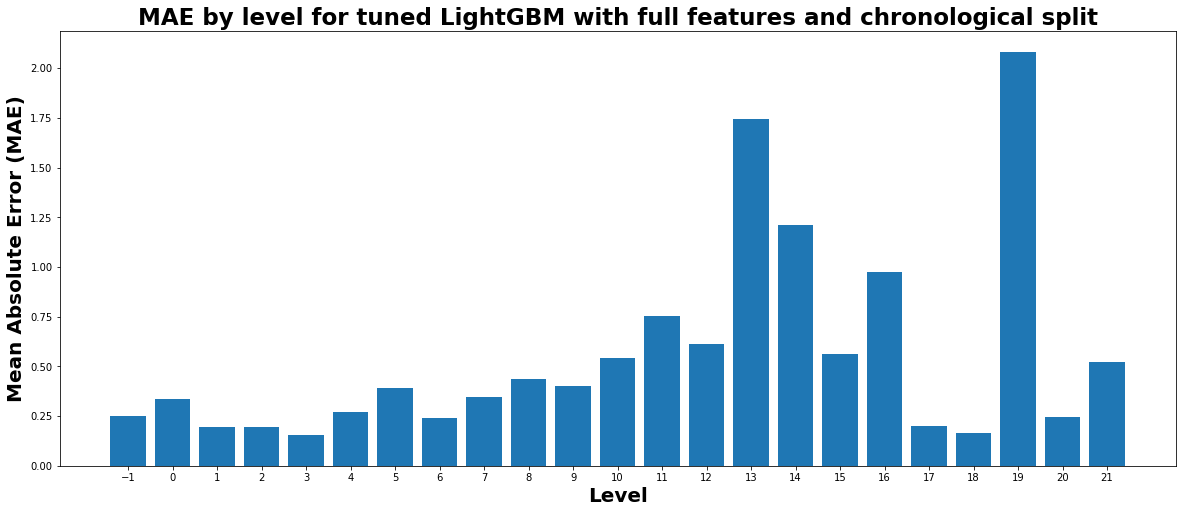

In [27]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and chronological split",
)

In [28]:
predict = lgb_tuned.predict(X_test)
check_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.70

Round type: 0.5
RMSE: 0.75

Round type: 0.33
RMSE: 0.70

Round type: 0.45
RMSE: 0.74



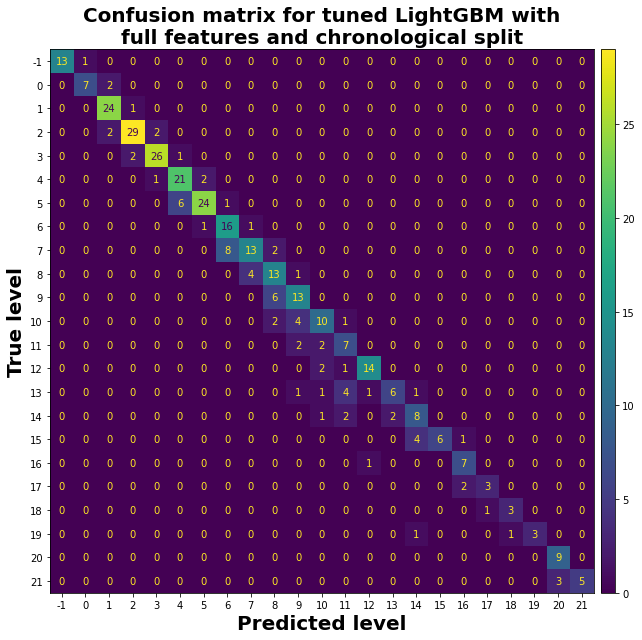

In [29]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and chronological split",
)

## Random split

In [30]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)
lgb_eval = lgb.Dataset(X_test_random_split, y_test_random_split, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 904, number of used features: 48
[LightGBM] [Info] Start training from score 7.162611
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's l1: 0.246737	valid_0's l2: 0.1379


In [31]:
y_pred_train = gbm.predict(X_train_random_split, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test_random_split, num_iteration=gbm.best_iteration)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test_random_split, y_pred_test, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.37
MAE: 0.25


In [33]:
results.loc[2] = ["random", "default", "full", rmse, mae]

###### MAE by level

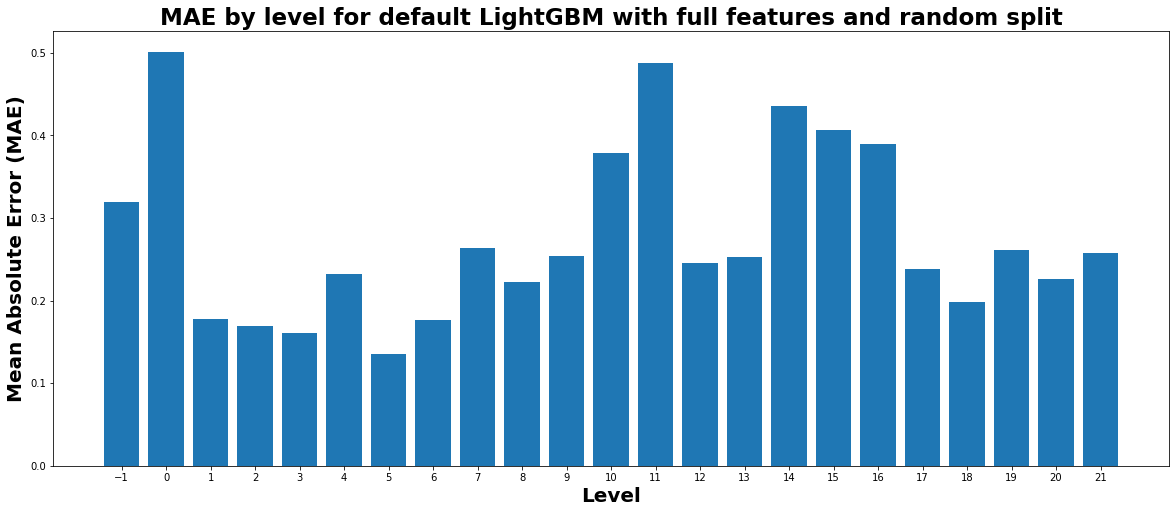

In [34]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and random split",
)

In [35]:
check_round_predictions([0.5, 0.33, 0.45], y_test_random_split, y_pred_test)

Default:
RMSE: 0.37

Round type: 0.5
RMSE: 0.38

Round type: 0.33
RMSE: 0.43

Round type: 0.45
RMSE: 0.38



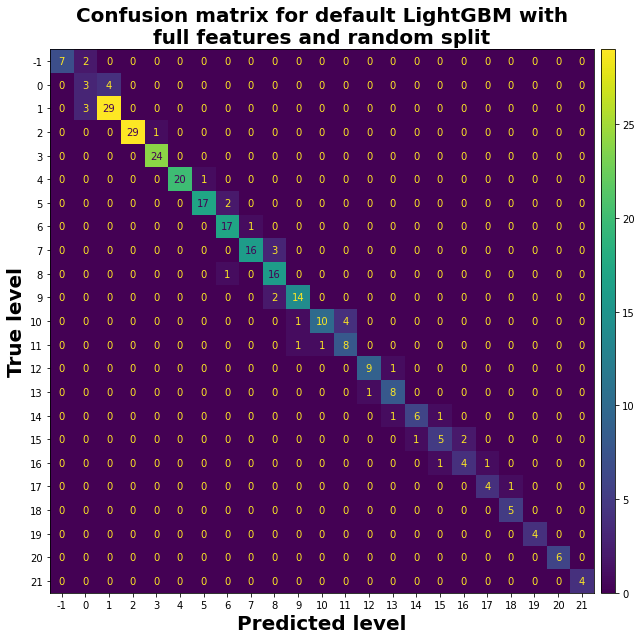

In [36]:
plot_confusion_matrix(
    y_pred_test,
    y_test_random_split,
    title="Confusion matrix for default LightGBM with\nfull features and random split",
)

### Tuning

In [37]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-09 13:29:37,647] A new study created in memory with name: no-name-738568c1-16c7-452f-8742-f187451ebde9
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.14129 + 0.0408562
[1100]	cv_agg's l2: 0.141235 + 0.0408164


feature_fraction, val_score: 0.141222:  14%|######4                                      | 1/7 [00:08<00:49,  8.31s/it]

Early stopping, best iteration is:
[1084]	cv_agg's l2: 0.141222 + 0.040796
[100]	cv_agg's l2: 0.172334 + 0.042053
[200]	cv_agg's l2: 0.168986 + 0.0412238
[300]	cv_agg's l2: 0.168127 + 0.0402121
[400]	cv_agg's l2: 0.167939 + 0.0398056
[500]	cv_agg's l2: 0.167589 + 0.0394759
[600]	cv_agg's l2: 0.16748 + 0.0394527
[700]	cv_agg's l2: 0.167367 + 0.0393743
[800]	cv_agg's l2: 0.167303 + 0.0392741
[900]	cv_agg's l2: 0.167172 + 0.039144
[1000]	cv_agg's l2: 0.167099 + 0.0390631
[1100]	cv_agg's l2: 0.167033 + 0.0389819


feature_fraction, val_score: 0.141222:  29%|############8                                | 2/7 [00:16<00:41,  8.27s/it]

Early stopping, best iteration is:
[1084]	cv_agg's l2: 0.141222 + 0.040796
[100]	cv_agg's l2: 0.178213 + 0.0507607
[200]	cv_agg's l2: 0.174713 + 0.0503862
[300]	cv_agg's l2: 0.173802 + 0.0502044
[400]	cv_agg's l2: 0.173289 + 0.0500017
[500]	cv_agg's l2: 0.173217 + 0.0497584
[600]	cv_agg's l2: 0.173025 + 0.0493394
[700]	cv_agg's l2: 0.172934 + 0.0491954
[800]	cv_agg's l2: 0.17295 + 0.049049
[900]	cv_agg's l2: 0.172925 + 0.048952
[1000]	cv_agg's l2: 0.172835 + 0.048857
[1100]	cv_agg's l2: 0.172822 + 0.0488237


feature_fraction, val_score: 0.141222:  43%|###################2                         | 3/7 [00:25<00:33,  8.40s/it]

Early stopping, best iteration is:
[1084]	cv_agg's l2: 0.141222 + 0.040796
[100]	cv_agg's l2: 0.172351 + 0.0397583
[200]	cv_agg's l2: 0.168372 + 0.0376864
[300]	cv_agg's l2: 0.167696 + 0.0376949
[400]	cv_agg's l2: 0.167117 + 0.0372692
[500]	cv_agg's l2: 0.166965 + 0.0369309
[600]	cv_agg's l2: 0.166927 + 0.0367331
[700]	cv_agg's l2: 0.16686 + 0.0366369
[800]	cv_agg's l2: 0.166793 + 0.0365553
[900]	cv_agg's l2: 0.166792 + 0.0364638
[1000]	cv_agg's l2: 0.166754 + 0.0363794
[1100]	cv_agg's l2: 0.166674 + 0.0362533


feature_fraction, val_score: 0.141222:  57%|#########################7                   | 4/7 [00:33<00:25,  8.57s/it]

Early stopping, best iteration is:
[1084]	cv_agg's l2: 0.141222 + 0.040796
[100]	cv_agg's l2: 0.168521 + 0.0554628
[200]	cv_agg's l2: 0.164251 + 0.0530763
[300]	cv_agg's l2: 0.16318 + 0.0513101
[400]	cv_agg's l2: 0.162435 + 0.0506564
[500]	cv_agg's l2: 0.162199 + 0.0503688
[600]	cv_agg's l2: 0.162226 + 0.0501763
[700]	cv_agg's l2: 0.162085 + 0.0499092
[800]	cv_agg's l2: 0.162094 + 0.0497114
[900]	cv_agg's l2: 0.162036 + 0.0495859
[1000]	cv_agg's l2: 0.162041 + 0.0494917
[1100]	cv_agg's l2: 0.162069 + 0.0494758


feature_fraction, val_score: 0.141222:  71%|################################1            | 5/7 [00:41<00:16,  8.12s/it]

Early stopping, best iteration is:
[1084]	cv_agg's l2: 0.141222 + 0.040796
[100]	cv_agg's l2: 0.153382 + 0.0436856
[200]	cv_agg's l2: 0.148916 + 0.0420943
[300]	cv_agg's l2: 0.147196 + 0.0411962
[400]	cv_agg's l2: 0.146616 + 0.0406682
[500]	cv_agg's l2: 0.146028 + 0.0401192
[600]	cv_agg's l2: 0.14571 + 0.0398678
[700]	cv_agg's l2: 0.145442 + 0.039609
[800]	cv_agg's l2: 0.145248 + 0.0394982
[900]	cv_agg's l2: 0.145159 + 0.0394057
[1000]	cv_agg's l2: 0.145045 + 0.0393345
[1100]	cv_agg's l2: 0.144938 + 0.0392749


feature_fraction, val_score: 0.141222:  86%|######################################5      | 6/7 [00:49<00:08,  8.21s/it]

Early stopping, best iteration is:
[1084]	cv_agg's l2: 0.141222 + 0.040796
[100]	cv_agg's l2: 0.167771 + 0.0619724
[200]	cv_agg's l2: 0.163848 + 0.0584553
[300]	cv_agg's l2: 0.162937 + 0.0569901
[400]	cv_agg's l2: 0.162434 + 0.0564138
[500]	cv_agg's l2: 0.162117 + 0.0558444
[600]	cv_agg's l2: 0.16209 + 0.0555988
[700]	cv_agg's l2: 0.161994 + 0.0554463
[800]	cv_agg's l2: 0.162009 + 0.0553263
[900]	cv_agg's l2: 0.161941 + 0.0552453
[1000]	cv_agg's l2: 0.161903 + 0.0552057
[1100]	cv_agg's l2: 0.161846 + 0.0551428


feature_fraction, val_score: 0.141222: 100%|#############################################| 7/7 [00:58<00:00,  8.30s/it]


Early stopping, best iteration is:
[1084]	cv_agg's l2: 0.141222 + 0.040796


num_leaves, val_score: 0.141222:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.141222:   5%|##5                                               | 1/20 [00:09<02:51,  9.05s/it]

Early stopping, best iteration is:
[1084]	cv_agg's l2: 0.141222 + 0.040796
[100]	cv_agg's l2: 0.158042 + 0.0387961
[200]	cv_agg's l2: 0.14796 + 0.0351245
[300]	cv_agg's l2: 0.14367 + 0.0355571
[400]	cv_agg's l2: 0.141597 + 0.0352504
[500]	cv_agg's l2: 0.139908 + 0.0352147
[600]	cv_agg's l2: 0.139349 + 0.035461
[700]	cv_agg's l2: 0.138964 + 0.034903
[800]	cv_agg's l2: 0.138376 + 0.0344383
[900]	cv_agg's l2: 0.137984 + 0.0342364
[1000]	cv_agg's l2: 0.137979 + 0.0341809
[1100]	cv_agg's l2: 0.137795 + 0.0338165


num_leaves, val_score: 0.137777:  10%|#####                                             | 2/20 [00:12<01:48,  6.01s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  15%|#######5                                          | 3/20 [00:21<01:59,  7.03s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.169618 + 0.0439397
[200]	cv_agg's l2: 0.159635 + 0.0422712
[300]	cv_agg's l2: 0.153567 + 0.0417983
[400]	cv_agg's l2: 0.15073 + 0.0406751
[500]	cv_agg's l2: 0.149417 + 0.0405327
[600]	cv_agg's l2: 0.147822 + 0.0398642
[700]	cv_agg's l2: 0.14765 + 0.0395364
[800]	cv_agg's l2: 0.147418 + 0.0386817
[900]	cv_agg's l2: 0.146982 + 0.0376832
[1000]	cv_agg's l2: 0.146259 + 0.0371192
[1100]	cv_agg's l2: 0.145709 + 0.0365168


num_leaves, val_score: 0.137777:  20%|##########                                        | 4/20 [00:24<01:28,  5.53s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.158522 + 0.0463807
[200]	cv_agg's l2: 0.152266 + 0.0447224
[300]	cv_agg's l2: 0.15012 + 0.0436749
[400]	cv_agg's l2: 0.149228 + 0.0430697
[500]	cv_agg's l2: 0.148977 + 0.0425456
[600]	cv_agg's l2: 0.148497 + 0.0422372
[700]	cv_agg's l2: 0.148485 + 0.0419186
[800]	cv_agg's l2: 0.148327 + 0.0417818
[900]	cv_agg's l2: 0.148203 + 0.0415753
[1000]	cv_agg's l2: 0.148038 + 0.0414365
[1100]	cv_agg's l2: 0.147982 + 0.0413619


num_leaves, val_score: 0.137777:  25%|############5                                     | 5/20 [00:30<01:23,  5.56s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  30%|###############                                   | 6/20 [00:38<01:29,  6.42s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  35%|#################5                                | 7/20 [00:46<01:33,  7.16s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  40%|####################                              | 8/20 [00:55<01:30,  7.56s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  45%|######################5                           | 9/20 [01:03<01:24,  7.71s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  50%|########################5                        | 10/20 [01:13<01:24,  8.43s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  55%|##########################9                      | 11/20 [01:22<01:17,  8.62s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  60%|#############################4                   | 12/20 [01:33<01:14,  9.28s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  65%|###############################8                 | 13/20 [01:42<01:05,  9.30s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  70%|##################################3              | 14/20 [01:50<00:53,  8.90s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  75%|####################################7            | 15/20 [01:58<00:43,  8.64s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  80%|#######################################2         | 16/20 [02:07<00:34,  8.68s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  85%|#########################################6       | 17/20 [02:15<00:25,  8.57s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  90%|############################################1    | 18/20 [02:23<00:16,  8.41s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777:  95%|##############################################5  | 19/20 [02:31<00:08,  8.33s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.150894 + 0.0457215
[200]	cv_agg's l2: 0.144559 + 0.0420919
[300]	cv_agg's l2: 0.142986 + 0.041463
[400]	cv_agg's l2: 0.142093 + 0.041546
[500]	cv_agg's l2: 0.141892 + 0.0412928
[600]	cv_agg's l2: 0.141661 + 0.0411157
[700]	cv_agg's l2: 0.141421 + 0.040923
[800]	cv_agg's l2: 0.14129 + 0.0409153
[900]	cv_agg's l2: 0.141284 + 0.0409018
[1000]	cv_agg's l2: 0.141295 + 0.0408652
[1100]	cv_agg's l2: 0.141251 + 0.0408449


num_leaves, val_score: 0.137777: 100%|#################################################| 20/20 [02:39<00:00,  7.98s/it]


Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006


bagging, val_score: 0.137777:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.202081 + 0.0358951
[200]	cv_agg's l2: 0.182574 + 0.0336389
[300]	cv_agg's l2: 0.171809 + 0.0326067
[400]	cv_agg's l2: 0.168037 + 0.031088
[500]	cv_agg's l2: 0.167242 + 0.0315126
[600]	cv_agg's l2: 0.166098 + 0.0289348
[700]	cv_agg's l2: 0.165414 + 0.0260496
[800]	cv_agg's l2: 0.164899 + 0.0262267
[900]	cv_agg's l2: 0.165465 + 0.0257883
[1000]	cv_agg's l2: 0.164861 + 0.0259518
[1100]	cv_agg's l2: 0.16523 + 0.0256121


bagging, val_score: 0.137777:  10%|#####3                                               | 1/10 [00:04<00:36,  4.05s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.158978 + 0.0430536
[200]	cv_agg's l2: 0.148627 + 0.0402827
[300]	cv_agg's l2: 0.143848 + 0.0386245
[400]	cv_agg's l2: 0.141966 + 0.0376999
[500]	cv_agg's l2: 0.140561 + 0.0373173
[600]	cv_agg's l2: 0.139624 + 0.0371169
[700]	cv_agg's l2: 0.13889 + 0.0366371
[800]	cv_agg's l2: 0.138645 + 0.0363824
[900]	cv_agg's l2: 0.138182 + 0.0361851
[1000]	cv_agg's l2: 0.137939 + 0.036129
[1100]	cv_agg's l2: 0.138209 + 0.036356


bagging, val_score: 0.137777:  20%|##########6                                          | 2/10 [00:08<00:33,  4.14s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.1603 + 0.0368774
[200]	cv_agg's l2: 0.152959 + 0.0368278
[300]	cv_agg's l2: 0.149016 + 0.03626
[400]	cv_agg's l2: 0.146471 + 0.035048
[500]	cv_agg's l2: 0.144649 + 0.0344028
[600]	cv_agg's l2: 0.143825 + 0.0343684
[700]	cv_agg's l2: 0.14299 + 0.0342191
[800]	cv_agg's l2: 0.142847 + 0.0341233
[900]	cv_agg's l2: 0.142964 + 0.0343469
[1000]	cv_agg's l2: 0.143183 + 0.0346559
[1100]	cv_agg's l2: 0.143094 + 0.0344217


bagging, val_score: 0.137777:  30%|###############9                                     | 3/10 [00:12<00:28,  4.07s/it]

Early stopping, best iteration is:
[1086]	cv_agg's l2: 0.137777 + 0.0339006
[100]	cv_agg's l2: 0.156103 + 0.0464529
[200]	cv_agg's l2: 0.14693 + 0.0411807
[300]	cv_agg's l2: 0.141906 + 0.0398442
[400]	cv_agg's l2: 0.139978 + 0.0394805
[500]	cv_agg's l2: 0.138639 + 0.0392708
[600]	cv_agg's l2: 0.137401 + 0.0390165
[700]	cv_agg's l2: 0.136812 + 0.0388385
[800]	cv_agg's l2: 0.136416 + 0.0385488
[900]	cv_agg's l2: 0.136254 + 0.0379494
[1000]	cv_agg's l2: 0.135834 + 0.0377201
[1100]	cv_agg's l2: 0.135761 + 0.0374124
[1200]	cv_agg's l2: 0.135518 + 0.037149


bagging, val_score: 0.135428:  40%|#####################2                               | 4/10 [00:16<00:24,  4.13s/it]

Early stopping, best iteration is:
[1166]	cv_agg's l2: 0.135428 + 0.0371263
[100]	cv_agg's l2: 0.158042 + 0.0387961
[200]	cv_agg's l2: 0.14796 + 0.0351245
[300]	cv_agg's l2: 0.14367 + 0.0355571
[400]	cv_agg's l2: 0.141597 + 0.0352504
[500]	cv_agg's l2: 0.139908 + 0.0352147
[600]	cv_agg's l2: 0.139349 + 0.035461
[700]	cv_agg's l2: 0.138964 + 0.034903
[800]	cv_agg's l2: 0.138376 + 0.0344383
[900]	cv_agg's l2: 0.137984 + 0.0342364
[1000]	cv_agg's l2: 0.137979 + 0.0341809
[1100]	cv_agg's l2: 0.137795 + 0.0338165
[1200]	cv_agg's l2: 0.137832 + 0.0337163
Early stopping, best iteration is:
[1166]	cv_agg's l2: 0.135428 + 0.0371263


bagging, val_score: 0.135428:  50%|##########################5                          | 5/10 [00:20<00:20,  4.15s/it]

[100]	cv_agg's l2: 0.156833 + 0.0390849
[200]	cv_agg's l2: 0.146784 + 0.0359885
[300]	cv_agg's l2: 0.141862 + 0.0349447
[400]	cv_agg's l2: 0.139449 + 0.0347105
[500]	cv_agg's l2: 0.138444 + 0.0348213
[600]	cv_agg's l2: 0.137588 + 0.0349384
[700]	cv_agg's l2: 0.13723 + 0.0349009
[800]	cv_agg's l2: 0.136722 + 0.0343885
[900]	cv_agg's l2: 0.136536 + 0.0341633
[1000]	cv_agg's l2: 0.136617 + 0.034311
[1100]	cv_agg's l2: 0.136597 + 0.0342158
[1200]	cv_agg's l2: 0.136697 + 0.0344486


bagging, val_score: 0.135428:  60%|###############################8                     | 6/10 [00:24<00:16,  4.22s/it]

Early stopping, best iteration is:
[1166]	cv_agg's l2: 0.135428 + 0.0371263
[100]	cv_agg's l2: 0.159705 + 0.0445336
[200]	cv_agg's l2: 0.1481 + 0.0409156
[300]	cv_agg's l2: 0.145406 + 0.0408735
[400]	cv_agg's l2: 0.144863 + 0.0414386
[500]	cv_agg's l2: 0.142697 + 0.0411122
[600]	cv_agg's l2: 0.141946 + 0.040158
[700]	cv_agg's l2: 0.141159 + 0.039989
[800]	cv_agg's l2: 0.140581 + 0.0396274
[900]	cv_agg's l2: 0.140768 + 0.0397582
[1000]	cv_agg's l2: 0.140696 + 0.0399018
[1100]	cv_agg's l2: 0.140628 + 0.0396082
[1200]	cv_agg's l2: 0.140757 + 0.0392111


bagging, val_score: 0.135428:  70%|#####################################                | 7/10 [00:29<00:12,  4.24s/it]

Early stopping, best iteration is:
[1166]	cv_agg's l2: 0.135428 + 0.0371263
[100]	cv_agg's l2: 0.160005 + 0.0407488
[200]	cv_agg's l2: 0.148712 + 0.0373571
[300]	cv_agg's l2: 0.144962 + 0.0366504
[400]	cv_agg's l2: 0.141817 + 0.0360348
[500]	cv_agg's l2: 0.140313 + 0.0358483
[600]	cv_agg's l2: 0.139767 + 0.0358043
[700]	cv_agg's l2: 0.139429 + 0.0354294
[800]	cv_agg's l2: 0.138807 + 0.0349928
[900]	cv_agg's l2: 0.138195 + 0.0346056
[1000]	cv_agg's l2: 0.137868 + 0.034128
[1100]	cv_agg's l2: 0.13784 + 0.0344202
[1200]	cv_agg's l2: 0.137702 + 0.0340936


bagging, val_score: 0.135428:  80%|##########################################4          | 8/10 [00:34<00:08,  4.41s/it]

Early stopping, best iteration is:
[1166]	cv_agg's l2: 0.135428 + 0.0371263
[100]	cv_agg's l2: 0.169364 + 0.046892
[200]	cv_agg's l2: 0.15811 + 0.0431861
[300]	cv_agg's l2: 0.15388 + 0.0430638
[400]	cv_agg's l2: 0.151591 + 0.0420686
[500]	cv_agg's l2: 0.149878 + 0.0404374
[600]	cv_agg's l2: 0.149767 + 0.0407781
[700]	cv_agg's l2: 0.148981 + 0.0392911
[800]	cv_agg's l2: 0.148164 + 0.0390021
[900]	cv_agg's l2: 0.147565 + 0.0385028
[1000]	cv_agg's l2: 0.147152 + 0.0378835
[1100]	cv_agg's l2: 0.146988 + 0.0378068
[1200]	cv_agg's l2: 0.146624 + 0.0371925


bagging, val_score: 0.135428:  90%|###############################################7     | 9/10 [00:39<00:04,  4.64s/it]

Early stopping, best iteration is:
[1166]	cv_agg's l2: 0.135428 + 0.0371263
[100]	cv_agg's l2: 0.174755 + 0.0495336
[200]	cv_agg's l2: 0.161632 + 0.0455892
[300]	cv_agg's l2: 0.156731 + 0.0433242
[400]	cv_agg's l2: 0.153624 + 0.0416255
[500]	cv_agg's l2: 0.150349 + 0.0409621
[600]	cv_agg's l2: 0.150049 + 0.0401102
[700]	cv_agg's l2: 0.149278 + 0.0404963
[800]	cv_agg's l2: 0.148384 + 0.0402053
[900]	cv_agg's l2: 0.148294 + 0.0404579
[1000]	cv_agg's l2: 0.147727 + 0.039862
[1100]	cv_agg's l2: 0.147404 + 0.0396962
[1200]	cv_agg's l2: 0.147011 + 0.0393554


bagging, val_score: 0.135428: 100%|####################################################| 10/10 [00:43<00:00,  4.37s/it]


Early stopping, best iteration is:
[1166]	cv_agg's l2: 0.135428 + 0.0371263


feature_fraction_stage2, val_score: 0.135428:   0%|                                              | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.149651 + 0.0345894
[200]	cv_agg's l2: 0.139758 + 0.0298982
[300]	cv_agg's l2: 0.134393 + 0.0284866
[400]	cv_agg's l2: 0.131608 + 0.0270853
[500]	cv_agg's l2: 0.130343 + 0.0263474
[600]	cv_agg's l2: 0.129333 + 0.02618
[700]	cv_agg's l2: 0.128827 + 0.0259373


feature_fraction_stage2, val_score: 0.128596:  33%|############6                         | 1/3 [00:02<00:05,  2.85s/it]

[800]	cv_agg's l2: 0.128842 + 0.0256233
Early stopping, best iteration is:
[721]	cv_agg's l2: 0.128596 + 0.0258124
[100]	cv_agg's l2: 0.152869 + 0.0369863
[200]	cv_agg's l2: 0.145126 + 0.0347671
[300]	cv_agg's l2: 0.141374 + 0.0330363
[400]	cv_agg's l2: 0.139193 + 0.0318634
[500]	cv_agg's l2: 0.137185 + 0.0309226
[600]	cv_agg's l2: 0.136803 + 0.0310534
[700]	cv_agg's l2: 0.135804 + 0.0306843


feature_fraction_stage2, val_score: 0.128596:  67%|#########################3            | 2/3 [00:05<00:02,  2.83s/it]

[800]	cv_agg's l2: 0.135352 + 0.03009
Early stopping, best iteration is:
[721]	cv_agg's l2: 0.128596 + 0.0258124
[100]	cv_agg's l2: 0.160876 + 0.0395234
[200]	cv_agg's l2: 0.149752 + 0.0362567
[300]	cv_agg's l2: 0.144921 + 0.0348204
[400]	cv_agg's l2: 0.142153 + 0.0337786
[500]	cv_agg's l2: 0.140343 + 0.0326322
[600]	cv_agg's l2: 0.139049 + 0.0322607
[700]	cv_agg's l2: 0.138479 + 0.0317706


feature_fraction_stage2, val_score: 0.128596: 100%|######################################| 3/3 [00:08<00:00,  2.83s/it]


[800]	cv_agg's l2: 0.137829 + 0.0314365
Early stopping, best iteration is:
[721]	cv_agg's l2: 0.128596 + 0.0258124


regularization_factors, val_score: 0.128596:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.149079 + 0.034999
[200]	cv_agg's l2: 0.138586 + 0.0312424
[300]	cv_agg's l2: 0.13379 + 0.0296606
[400]	cv_agg's l2: 0.131833 + 0.0296093
[500]	cv_agg's l2: 0.1305 + 0.027996
[600]	cv_agg's l2: 0.129841 + 0.0275306
[700]	cv_agg's l2: 0.129341 + 0.0269516


regularization_factors, val_score: 0.128596:   5%|#9                                    | 1/20 [00:02<00:55,  2.91s/it]

[800]	cv_agg's l2: 0.128708 + 0.0264948
Early stopping, best iteration is:
[721]	cv_agg's l2: 0.128596 + 0.0258124
[100]	cv_agg's l2: 0.148666 + 0.0328658
[200]	cv_agg's l2: 0.139274 + 0.0284433
[300]	cv_agg's l2: 0.134805 + 0.0272717
[400]	cv_agg's l2: 0.133125 + 0.025912
[500]	cv_agg's l2: 0.131649 + 0.0249255
[600]	cv_agg's l2: 0.131173 + 0.0244751
[700]	cv_agg's l2: 0.130427 + 0.0244691


regularization_factors, val_score: 0.128596:  10%|###8                                  | 2/20 [00:06<00:54,  3.01s/it]

[800]	cv_agg's l2: 0.130013 + 0.0239704
Early stopping, best iteration is:
[721]	cv_agg's l2: 0.128596 + 0.0258124
[100]	cv_agg's l2: 0.149079 + 0.034999
[200]	cv_agg's l2: 0.138586 + 0.0312423
[300]	cv_agg's l2: 0.13379 + 0.0296604
[400]	cv_agg's l2: 0.131833 + 0.0296092
[500]	cv_agg's l2: 0.1305 + 0.0279958
[600]	cv_agg's l2: 0.12984 + 0.0275304
[700]	cv_agg's l2: 0.129341 + 0.0269514


regularization_factors, val_score: 0.128596:  15%|#####7                                | 3/20 [00:09<00:51,  3.06s/it]

[800]	cv_agg's l2: 0.128708 + 0.0264946
Early stopping, best iteration is:
[721]	cv_agg's l2: 0.128596 + 0.0258124
[100]	cv_agg's l2: 0.14735 + 0.0337457
[200]	cv_agg's l2: 0.138037 + 0.0287191
[300]	cv_agg's l2: 0.132462 + 0.0272668
[400]	cv_agg's l2: 0.130094 + 0.0253612
[500]	cv_agg's l2: 0.129941 + 0.0244318
[600]	cv_agg's l2: 0.129158 + 0.0242249
[700]	cv_agg's l2: 0.128481 + 0.0236297
[800]	cv_agg's l2: 0.128065 + 0.0227362


regularization_factors, val_score: 0.127943:  20%|#######6                              | 4/20 [00:12<00:51,  3.21s/it][I 2023-11-09 13:34:20,092] Trial 43 finished with value: 0.12794322045466935 and parameters: {'lambda_l1': 0.0016461822809929144, 'lambda_l2': 0.039496758776274656}. Best is trial 43 with value: 0.12794322045466935.


[900]	cv_agg's l2: 0.128139 + 0.0226212
Early stopping, best iteration is:
[848]	cv_agg's l2: 0.127943 + 0.0226085


regularization_factors, val_score: 0.127943:  20%|#######6                              | 4/20 [00:12<00:51,  3.21s/it]

[100]	cv_agg's l2: 0.147695 + 0.0335864
[200]	cv_agg's l2: 0.138322 + 0.0292192
[300]	cv_agg's l2: 0.13415 + 0.0277856
[400]	cv_agg's l2: 0.132063 + 0.0272649
[500]	cv_agg's l2: 0.131088 + 0.0266517
[600]	cv_agg's l2: 0.130586 + 0.0259117
[700]	cv_agg's l2: 0.130174 + 0.0248648
[800]	cv_agg's l2: 0.129821 + 0.0247624


regularization_factors, val_score: 0.127943:  25%|#########5                            | 5/20 [00:16<00:50,  3.37s/it]

[900]	cv_agg's l2: 0.12965 + 0.0247462
Early stopping, best iteration is:
[848]	cv_agg's l2: 0.127943 + 0.0226085
[100]	cv_agg's l2: 0.14688 + 0.0340436
[200]	cv_agg's l2: 0.137453 + 0.0291735
[300]	cv_agg's l2: 0.132461 + 0.0274691
[400]	cv_agg's l2: 0.13014 + 0.0256596
[500]	cv_agg's l2: 0.129144 + 0.025013
[600]	cv_agg's l2: 0.128369 + 0.02485
[700]	cv_agg's l2: 0.127745 + 0.0243499
[800]	cv_agg's l2: 0.127098 + 0.0235387


regularization_factors, val_score: 0.126953:  25%|#########5                            | 5/20 [00:19<00:50,  3.37s/it]

[900]	cv_agg's l2: 0.127096 + 0.0234219
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  30%|###########4                          | 6/20 [00:19<00:46,  3.32s/it]

[100]	cv_agg's l2: 0.147814 + 0.0324612
[200]	cv_agg's l2: 0.13859 + 0.0278477
[300]	cv_agg's l2: 0.134097 + 0.0262334
[400]	cv_agg's l2: 0.131631 + 0.0251292
[500]	cv_agg's l2: 0.130176 + 0.0242113
[600]	cv_agg's l2: 0.13017 + 0.0236236
[700]	cv_agg's l2: 0.129449 + 0.023307
[800]	cv_agg's l2: 0.12917 + 0.0232158


regularization_factors, val_score: 0.126953:  30%|###########4                          | 6/20 [00:22<00:46,  3.32s/it]

[900]	cv_agg's l2: 0.12907 + 0.0226961
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  35%|#############3                        | 7/20 [00:22<00:43,  3.31s/it]

[100]	cv_agg's l2: 0.148243 + 0.0330028
[200]	cv_agg's l2: 0.138358 + 0.0285666
[300]	cv_agg's l2: 0.133512 + 0.0259643
[400]	cv_agg's l2: 0.131535 + 0.0247458
[500]	cv_agg's l2: 0.129795 + 0.0235811
[600]	cv_agg's l2: 0.128623 + 0.0224998
[700]	cv_agg's l2: 0.128132 + 0.0222866
[800]	cv_agg's l2: 0.127413 + 0.0218358
[900]	cv_agg's l2: 0.127425 + 0.0213986
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  40%|###############2                      | 8/20 [00:26<00:41,  3.47s/it]

[100]	cv_agg's l2: 0.171561 + 0.051455
[200]	cv_agg's l2: 0.157607 + 0.0498379
[300]	cv_agg's l2: 0.152503 + 0.0491356
[400]	cv_agg's l2: 0.149581 + 0.0478592
[500]	cv_agg's l2: 0.147693 + 0.0468239
[600]	cv_agg's l2: 0.145988 + 0.0450076
[700]	cv_agg's l2: 0.144616 + 0.0438607
[800]	cv_agg's l2: 0.144121 + 0.0430498


regularization_factors, val_score: 0.126953:  45%|#################1                    | 9/20 [00:30<00:38,  3.49s/it]

[900]	cv_agg's l2: 0.143781 + 0.0426733
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028
[100]	cv_agg's l2: 0.16537 + 0.0410426
[200]	cv_agg's l2: 0.156506 + 0.0392906
[300]	cv_agg's l2: 0.154042 + 0.0386751
[400]	cv_agg's l2: 0.152953 + 0.0385669
[500]	cv_agg's l2: 0.152338 + 0.0383151
[600]	cv_agg's l2: 0.151966 + 0.03825
[700]	cv_agg's l2: 0.151681 + 0.0381585
[800]	cv_agg's l2: 0.151429 + 0.0381322
[900]	cv_agg's l2: 0.151152 + 0.0381204


regularization_factors, val_score: 0.126953:  50%|##################5                  | 10/20 [00:32<00:32,  3.23s/it]

Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028
[100]	cv_agg's l2: 0.149571 + 0.0346146
[200]	cv_agg's l2: 0.141499 + 0.0299776
[300]	cv_agg's l2: 0.13616 + 0.0290788
[400]	cv_agg's l2: 0.133263 + 0.027855
[500]	cv_agg's l2: 0.131778 + 0.0271634
[600]	cv_agg's l2: 0.13072 + 0.0272486
[700]	cv_agg's l2: 0.130153 + 0.0267562
[800]	cv_agg's l2: 0.129962 + 0.0262659


regularization_factors, val_score: 0.126953:  50%|##################5                  | 10/20 [00:36<00:32,  3.23s/it]

[900]	cv_agg's l2: 0.129944 + 0.0262476
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  55%|####################3                | 11/20 [00:36<00:29,  3.30s/it]

[100]	cv_agg's l2: 0.150903 + 0.0340794
[200]	cv_agg's l2: 0.142102 + 0.0287916
[300]	cv_agg's l2: 0.138202 + 0.0283602
[400]	cv_agg's l2: 0.135298 + 0.0270873
[500]	cv_agg's l2: 0.133842 + 0.0263394
[600]	cv_agg's l2: 0.133373 + 0.02554
[700]	cv_agg's l2: 0.132666 + 0.0252637
[800]	cv_agg's l2: 0.132229 + 0.0249124
[900]	cv_agg's l2: 0.132044 + 0.0249636
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  60%|######################2              | 12/20 [00:39<00:26,  3.30s/it]

[100]	cv_agg's l2: 0.150072 + 0.0343643
[200]	cv_agg's l2: 0.139838 + 0.0302087
[300]	cv_agg's l2: 0.135324 + 0.0282059
[400]	cv_agg's l2: 0.133585 + 0.0265138
[500]	cv_agg's l2: 0.132354 + 0.0261095
[600]	cv_agg's l2: 0.131745 + 0.0256777
[700]	cv_agg's l2: 0.131055 + 0.0259382
[800]	cv_agg's l2: 0.131099 + 0.0257826


regularization_factors, val_score: 0.126953:  60%|######################2              | 12/20 [00:42<00:26,  3.30s/it]

[900]	cv_agg's l2: 0.130988 + 0.0254089
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  65%|########################             | 13/20 [00:42<00:23,  3.32s/it]

[100]	cv_agg's l2: 0.149572 + 0.0346151
[200]	cv_agg's l2: 0.1415 + 0.0299782
[300]	cv_agg's l2: 0.136001 + 0.0292072
[400]	cv_agg's l2: 0.132437 + 0.0283739
[500]	cv_agg's l2: 0.131309 + 0.027546
[600]	cv_agg's l2: 0.130581 + 0.0272395
[700]	cv_agg's l2: 0.129687 + 0.0263337
[800]	cv_agg's l2: 0.129397 + 0.0260381


regularization_factors, val_score: 0.126953:  70%|#########################9           | 14/20 [00:46<00:19,  3.29s/it]

[900]	cv_agg's l2: 0.129036 + 0.0257128
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028
[100]	cv_agg's l2: 0.149651 + 0.0345894
[200]	cv_agg's l2: 0.13965 + 0.0299794
[300]	cv_agg's l2: 0.134224 + 0.0286351
[400]	cv_agg's l2: 0.131199 + 0.0274699
[500]	cv_agg's l2: 0.13 + 0.026679
[600]	cv_agg's l2: 0.129088 + 0.0264163
[700]	cv_agg's l2: 0.128499 + 0.0262541
[800]	cv_agg's l2: 0.128443 + 0.0260034


regularization_factors, val_score: 0.126953:  75%|###########################7         | 15/20 [00:49<00:16,  3.27s/it][I 2023-11-09 13:34:56,827] Trial 54 finished with value: 0.12848717408339214 and parameters: {'lambda_l1': 4.340621959506074e-08, 'lambda_l2': 0.00021639488357255354}. Best is trial 45 with value: 0.12695313379260303.


[900]	cv_agg's l2: 0.128303 + 0.0256082
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  75%|###########################7         | 15/20 [00:49<00:16,  3.27s/it]

[100]	cv_agg's l2: 0.149651 + 0.0345894
[200]	cv_agg's l2: 0.13965 + 0.0299794
[300]	cv_agg's l2: 0.134224 + 0.0286351
[400]	cv_agg's l2: 0.131199 + 0.0274699
[500]	cv_agg's l2: 0.13 + 0.026679
[600]	cv_agg's l2: 0.129088 + 0.0264164
[700]	cv_agg's l2: 0.128499 + 0.0262542
[800]	cv_agg's l2: 0.128443 + 0.0260034


regularization_factors, val_score: 0.126953:  80%|#############################6       | 16/20 [00:52<00:12,  3.24s/it]

[900]	cv_agg's l2: 0.128304 + 0.0256082
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028
[100]	cv_agg's l2: 0.149651 + 0.0345894
[200]	cv_agg's l2: 0.139758 + 0.0298982
[300]	cv_agg's l2: 0.134393 + 0.0284866
[400]	cv_agg's l2: 0.131608 + 0.0270853
[500]	cv_agg's l2: 0.130343 + 0.0263474
[600]	cv_agg's l2: 0.129333 + 0.02618
[700]	cv_agg's l2: 0.128827 + 0.0259373
[800]	cv_agg's l2: 0.128842 + 0.0256232


regularization_factors, val_score: 0.126953:  80%|#############################6       | 16/20 [00:55<00:12,  3.24s/it]

[900]	cv_agg's l2: 0.128686 + 0.0253242
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  85%|###############################4     | 17/20 [00:55<00:09,  3.25s/it]

[100]	cv_agg's l2: 0.149651 + 0.0345894
[200]	cv_agg's l2: 0.13965 + 0.0299794
[300]	cv_agg's l2: 0.134224 + 0.0286351
[400]	cv_agg's l2: 0.131199 + 0.0274699
[500]	cv_agg's l2: 0.13 + 0.026679
[600]	cv_agg's l2: 0.129088 + 0.0264164
[700]	cv_agg's l2: 0.128499 + 0.0262542
[800]	cv_agg's l2: 0.128443 + 0.0260034


regularization_factors, val_score: 0.126953:  85%|###############################4     | 17/20 [00:58<00:09,  3.25s/it]

[900]	cv_agg's l2: 0.128387 + 0.0256136
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  90%|#################################3   | 18/20 [00:58<00:06,  3.24s/it]

[100]	cv_agg's l2: 0.149651 + 0.0345894
[200]	cv_agg's l2: 0.13965 + 0.0299794
[300]	cv_agg's l2: 0.134224 + 0.0286351
[400]	cv_agg's l2: 0.131199 + 0.0274699
[500]	cv_agg's l2: 0.13 + 0.026679
[600]	cv_agg's l2: 0.129088 + 0.0264164
[700]	cv_agg's l2: 0.128499 + 0.0262542
[800]	cv_agg's l2: 0.128443 + 0.0260034


regularization_factors, val_score: 0.126953:  90%|#################################3   | 18/20 [01:02<00:06,  3.24s/it]

[900]	cv_agg's l2: 0.128387 + 0.0256136
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


regularization_factors, val_score: 0.126953:  95%|###################################1 | 19/20 [01:02<00:03,  3.22s/it]

[100]	cv_agg's l2: 0.149651 + 0.0345894
[200]	cv_agg's l2: 0.13965 + 0.0299794
[300]	cv_agg's l2: 0.134224 + 0.0286351
[400]	cv_agg's l2: 0.131199 + 0.0274699
[500]	cv_agg's l2: 0.13 + 0.026679
[600]	cv_agg's l2: 0.129088 + 0.0264164
[700]	cv_agg's l2: 0.128499 + 0.0262542
[800]	cv_agg's l2: 0.128443 + 0.0260034


regularization_factors, val_score: 0.126953:  95%|###################################1 | 19/20 [01:05<00:03,  3.22s/it]

[900]	cv_agg's l2: 0.128387 + 0.0256136
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


min_data_in_leaf, val_score: 0.126953:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.686355 + 0.0675466
[200]	cv_agg's l2: 0.64282 + 0.0537953
[300]	cv_agg's l2: 0.623465 + 0.0509231
[400]	cv_agg's l2: 0.609125 + 0.0520201
[500]	cv_agg's l2: 0.600162 + 0.0559775
[600]	cv_agg's l2: 0.595263 + 0.0582744
[700]	cv_agg's l2: 0.593047 + 0.0575896
[800]	cv_agg's l2: 0.588789 + 0.0563473


min_data_in_leaf, val_score: 0.126953:  20%|#########                                    | 1/5 [00:02<00:11,  2.89s/it]

[900]	cv_agg's l2: 0.588778 + 0.0536976
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028
[100]	cv_agg's l2: 0.164625 + 0.0392186
[200]	cv_agg's l2: 0.154977 + 0.034912
[300]	cv_agg's l2: 0.149684 + 0.0318042
[400]	cv_agg's l2: 0.147592 + 0.0310914
[500]	cv_agg's l2: 0.145102 + 0.0306126
[600]	cv_agg's l2: 0.143398 + 0.030085
[700]	cv_agg's l2: 0.142521 + 0.0297136
[800]	cv_agg's l2: 0.141863 + 0.0294241


min_data_in_leaf, val_score: 0.126953:  40%|##################                           | 2/5 [00:06<00:09,  3.07s/it][I 2023-11-09 13:35:19,498] Trial 61 finished with value: 0.1418657561696012 and parameters: {'min_child_samples': 25}. Best is trial 61 with value: 0.1418657561696012.


[900]	cv_agg's l2: 0.141762 + 0.0291422
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028


min_data_in_leaf, val_score: 0.126953:  40%|##################                           | 2/5 [00:06<00:09,  3.07s/it]

[100]	cv_agg's l2: 0.145041 + 0.0332792
[200]	cv_agg's l2: 0.135775 + 0.0298385
[300]	cv_agg's l2: 0.132035 + 0.0286394
[400]	cv_agg's l2: 0.130354 + 0.0282672
[500]	cv_agg's l2: 0.129529 + 0.0276134
[600]	cv_agg's l2: 0.129413 + 0.0269106
[700]	cv_agg's l2: 0.129372 + 0.0268017
[800]	cv_agg's l2: 0.129462 + 0.027047


min_data_in_leaf, val_score: 0.126953:  60%|###########################                  | 3/5 [00:09<00:06,  3.14s/it]

[900]	cv_agg's l2: 0.129248 + 0.026835
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028
[100]	cv_agg's l2: 0.222725 + 0.0397538
[200]	cv_agg's l2: 0.211473 + 0.0359229
[300]	cv_agg's l2: 0.207901 + 0.0348525
[400]	cv_agg's l2: 0.205732 + 0.0335778
[500]	cv_agg's l2: 0.205427 + 0.0328285
[600]	cv_agg's l2: 0.206677 + 0.0316106
[700]	cv_agg's l2: 0.206955 + 0.0317723
[800]	cv_agg's l2: 0.2075 + 0.0309151


min_data_in_leaf, val_score: 0.126953:  80%|####################################         | 4/5 [00:12<00:03,  3.17s/it]

[900]	cv_agg's l2: 0.208366 + 0.0300838
Early stopping, best iteration is:
[852]	cv_agg's l2: 0.126953 + 0.0234028
[100]	cv_agg's l2: 0.143115 + 0.0307893
[200]	cv_agg's l2: 0.132697 + 0.0289663
[300]	cv_agg's l2: 0.127717 + 0.026931
[400]	cv_agg's l2: 0.124903 + 0.0259213
[500]	cv_agg's l2: 0.123207 + 0.0253973


min_data_in_leaf, val_score: 0.123166: 100%|#############################################| 5/5 [00:14<00:00,  2.95s/it]

[600]	cv_agg's l2: 0.12342 + 0.0254932
Early stopping, best iteration is:
[505]	cv_agg's l2: 0.123166 + 0.0251882


In [38]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.1231656333812525
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 0.001278563507542555
    lambda_l2: 0.038899104409389165
    num_leaves: 8
    feature_fraction: 0.48000000000000004
    bagging_fraction: 0.9898287216420012
    bagging_freq: 1
    min_child_samples: 10


In [39]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [40]:
rmse, mae = assess_regression_model(
    lgb_tuned,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.00
RMSE test: 0.33
MAE test: 0.23



In [41]:
results.loc[3] = ["random", "Optuna", "full", rmse, mae]

###### MAE by level

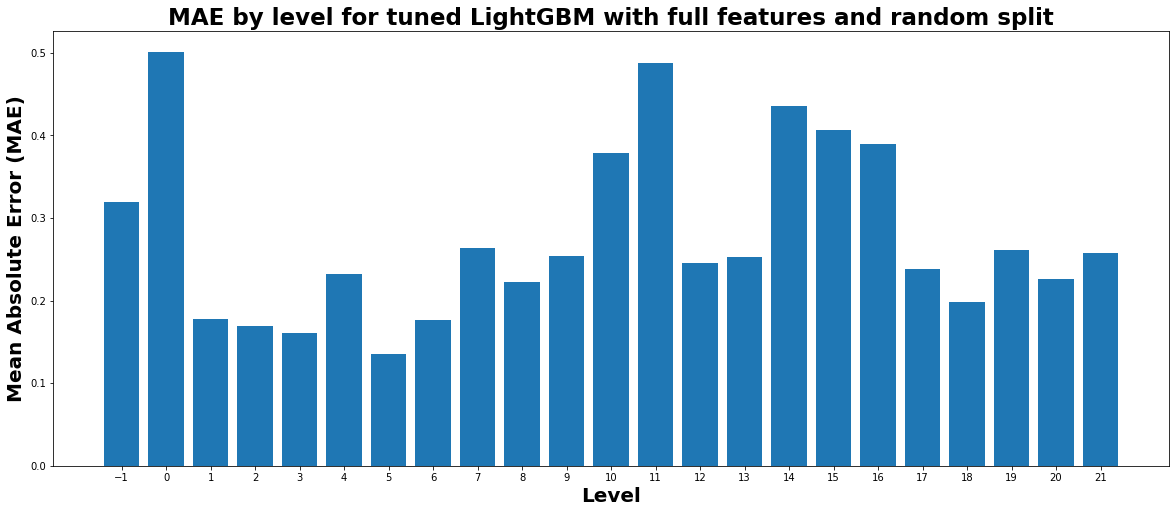

In [42]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and random split",
)

In [43]:
predict = lgb_tuned.predict(X_test)
check_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.20

Round type: 0.5
RMSE: 0.20

Round type: 0.33
RMSE: 0.22

Round type: 0.45
RMSE: 0.20



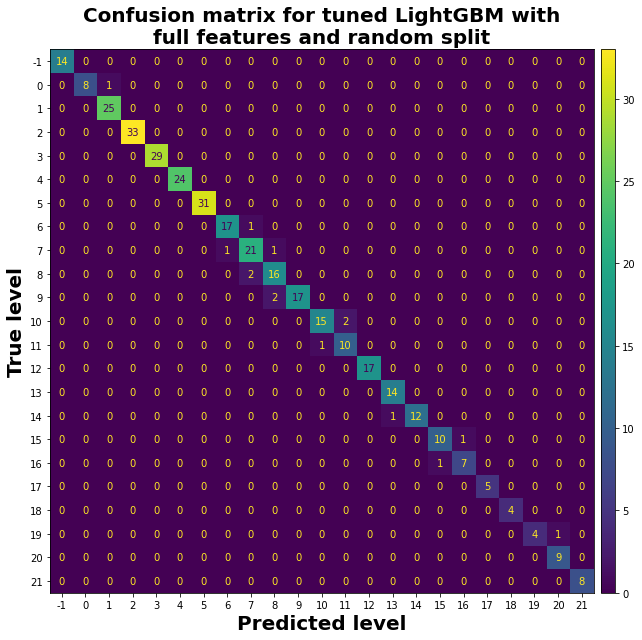

In [44]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and random split",
)

## Summary

In [45]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,full,0.965662,0.463517
1,chronological,Optuna,full,0.702718,0.404602
2,random,default,full,0.371349,0.246737
3,random,Optuna,full,0.329225,0.229756


In [46]:
from training.results import plot_summary

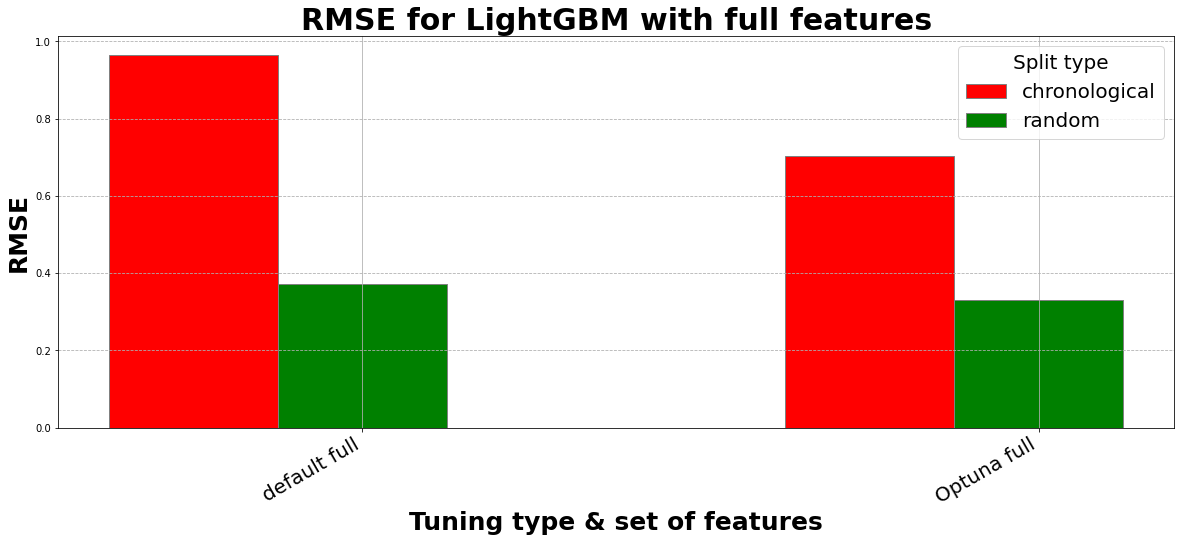

In [47]:
plot_summary(results, "RMSE", title="RMSE for LightGBM with full features")

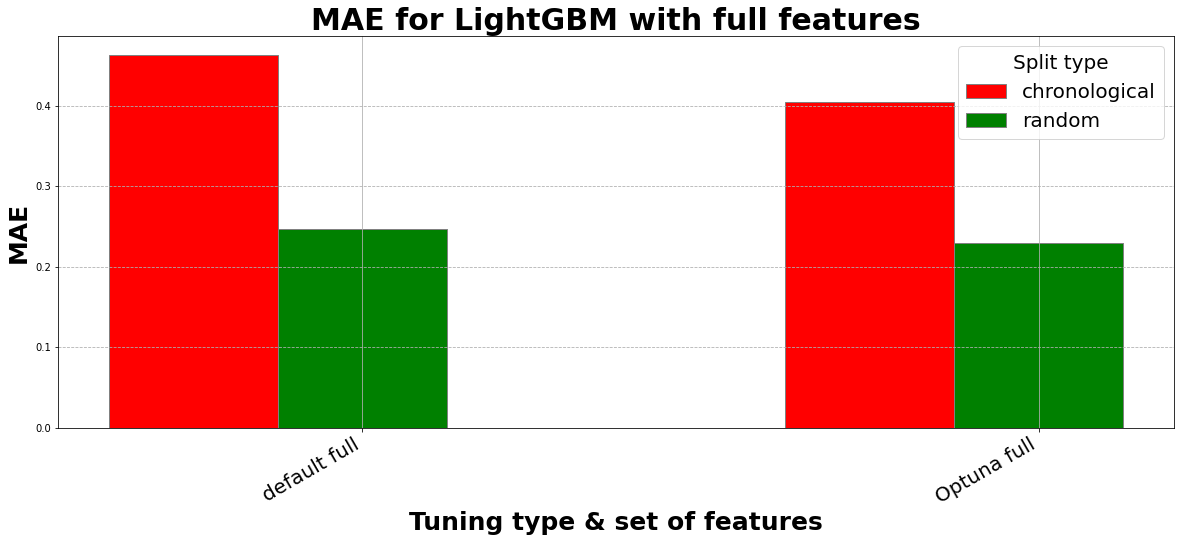

In [48]:
plot_summary(results, "MAE", title="MAE for LightGBM with full features")

In [49]:
results.to_json("./lightgbm_full_results.json", indent=2)